# 📊 Proyecto Guiado - Análisis de Ventas de Videojuegos
## Parte 2: Exploración Inicial - EDA

---

### 🎯 Objetivos de este notebook:
1. Realizar análisis estadístico descriptivo
2. Detectar valores nulos y duplicados
3. Analizar variables categóricas
4. Crear nuestras primeras visualizaciones
5. Identificar patrones iniciales en los datos

---

## 1. Importar librerías y cargar datos

In [1]:
%pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 


# Configuraciones
pd.set_option('display.max_columns', 100)

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid') #estilo de gráfico fondo gris con grid
sns.set_palette('husl') #paleta de colores



# Cargar dataset

datos = pd.read_csv('vgsales.csv')


---
## 2. Análisis Estadístico Descriptivo

El método `.describe()` proporciona estadísticas descriptivas de las columnas numéricas:
- **count**: Cantidad de valores no nulos
- **mean**: Promedio
- **std**: Desviación estándar (dispersión)
- **min**: Valor mínimo
- **25%, 50%, 75%**: Cuartiles (percentiles)
- **max**: Valor máximo

In [4]:
# Estadísticas descriptivas de variables numéricas
datos.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### 🔍 Interpretación:


In [ ]:
# Estadísticas de variables categóricas

datos.describe(include=['object'])




,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


### 🔍 Interpretación:


---
## 3. Análisis de Valores Nulos

Los valores nulos (NaN, None, missing values) son un problema común.
Debemos identificarlos y decidir cómo manejarlos.

In [ ]:
# Contar valores nulos por columna
# Crear un DataFrame con la información de nulos


datos_nulos = datos.isnull().sum()
datos_nulos

# Resumen


,Total Nulos,Porcentaje Nulos
Rank,0,0.000000
Name,0,0.000000
Platform,0,0.000000
Year,271,1.632727
Genre,0,0.000000
Publisher,58,0.349440
NA_Sales,0,0.000000
EU_Sales,0,0.000000
JP_Sales,0,0.000000
Other_Sales,0,0.000000


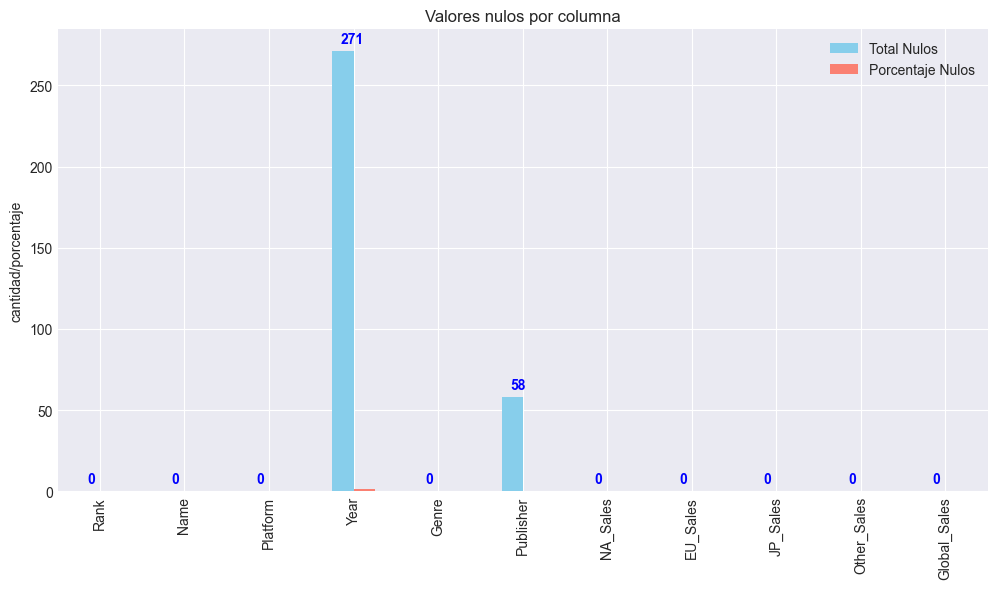

In [ ]:
# Visualización de valores nulos
# Calcular porcentaje de nulos

valores_nulos = pd.DataFrame({
    'Total Nulos': datos.isnull().sum(),
    'Porcentaje Nulos': (datos.isnull().sum() / len(datos)) * 100
})
valores_nulos




# Crear gráfico de barras
valores_nulos.plot(kind='bar', figsize=(12,6), color=['skyblue', 'salmon'], title='Valores nulos por columna')
plt.ylabel('cantidad/porcentaje')



# Añadir valores sobre las barras
for i, (total, pct) in enumerate(zip(valores_nulos['Total Nulos'], valores_nulos['Porcentaje Nulos'])):
    plt.text(i - 0.25, total + 5, str(total), color='blue', fontweight='bold')



---
## 4. Análisis de Duplicados

Los registros duplicados pueden distorsionar nuestro análisis.

In [39]:
# Verificar duplicados completos (todas las columnas iguales)
duplicados_completos = datos.duplicated().sum()
print(f'el total de filas duplicadas (todas las columnas): {duplicados_completos}')

# Verificar duplicados por nombre de juego
duplicados_nombre = datos['Name'].duplicated().sum()
print(f'Juegos con nombres duplicados:{duplicados_nombre}')

# Mostrar algunos ejemplos de juegos duplicados


if duplicados_nombre > 0:
    print("\n Ejemplos de juegos que aparecen en multiples plataformas:")
    juegos_duplicados = datos[datos['Name'].duplicated(keep=False)].sort_values(by='Name')
    print(juegos_duplicados[['Name', 'Platform', 'Year', 'Global_Sales']].head(10))  

el total de filas duplicadas (todas las columnas): 0
Juegos con nombres duplicados:5105

 Ejemplos de juegos que aparecen en multiples plataformas:
                               Name Platform    Year  Global_Sales
1739         007: Quantum of Solace      PS3  2008.0          1.16
9318         007: Quantum of Solace       DS  2008.0          0.14
14547        007: Quantum of Solace       PC  2008.0          0.03
1273         007: Quantum of Solace     X360  2008.0          1.49
4499         007: Quantum of Solace      PS2  2008.0          0.43
3038         007: Quantum of Solace      Wii  2008.0          0.67
2247   007: The World is not Enough       PS  2000.0          0.92
1200   007: The World is not Enough      N64  2000.0          1.55
15005             11eyes: CrossOver     X360  2009.0          0.02
15552             11eyes: CrossOver      PSP  2010.0          0.02


---
## 5. Análisis de Variables Categóricas

Vamos a explorar las variables categóricas en profundidad.

### 5.1 Plataformas (Platform)

el total de plataformas es:16598


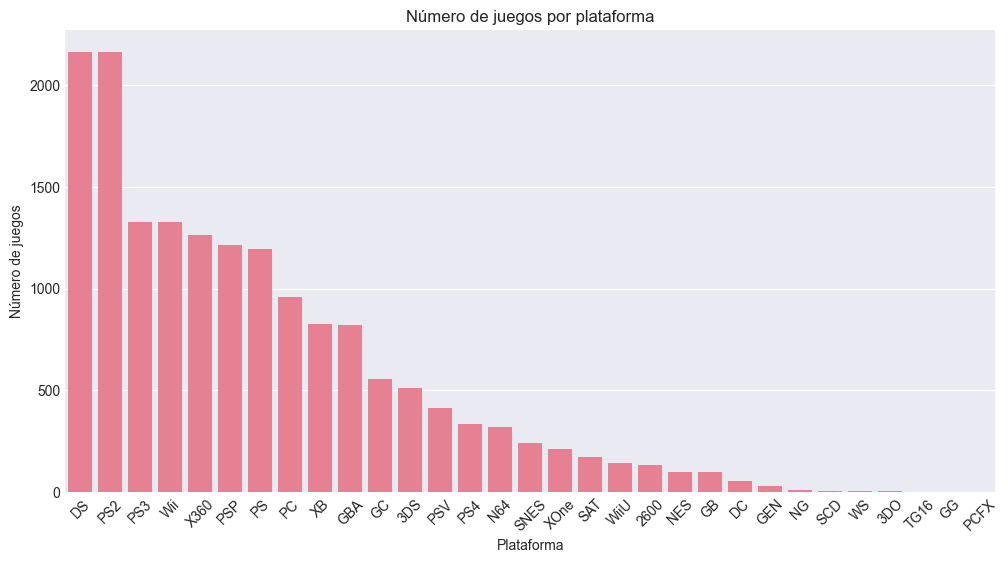

In [59]:
# Análisis de plataformas
plataformas = datos['Platform'].value_counts()
plataformas.unique()


# Contar plataformas
total_plataformas = plataformas.sum()

total_plataformas

print(f'el total de plataformas es:{total_plataformas}')
plataformas.head(10)
# Visualización

plt.figure(figsize=(12,6))
sns.barplot(x=plataformas.index, y=plataformas.values,)
plt.title('Número de juegos por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.show()





### 5.2 Géneros (Genre)

el total de géneros es:16598


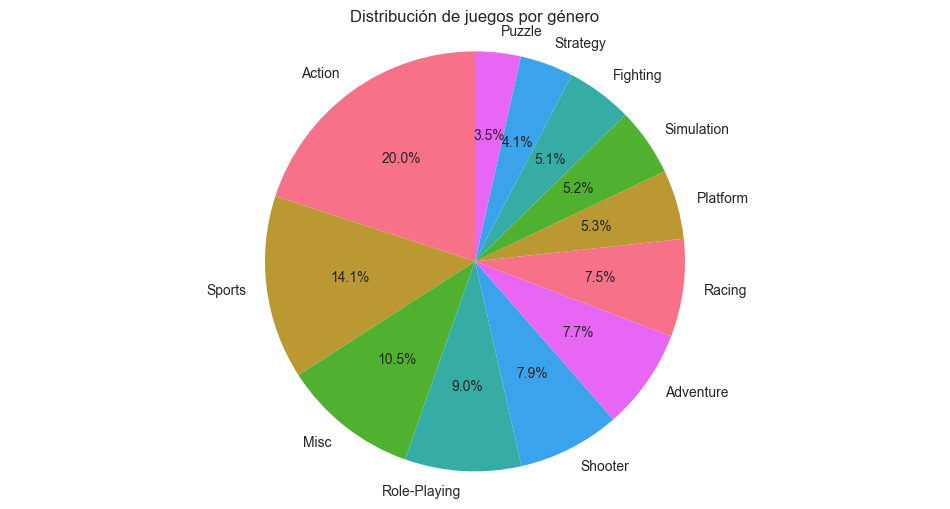

In [67]:
# Análisis de géneros
generos = datos['Genre'].value_counts()
generos.unique()

# Contar géneros
total_generos = generos.sum()
total_generos

print(f'el total de géneros es:{total_generos}')

# Visualización con gráfico de pastel
plt.figure(figsize=(12,6))
plt.pie(generos, labels=generos.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de juegos por género')
plt.axis('equal')
plt.show()


### 5.3 Publishers (Editores)

🏢 ANÁLISIS DE PUBLISHERS
Numero total de publishers: 578

Top 10 publishers por número de juegos:
Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: count, dtype: int64


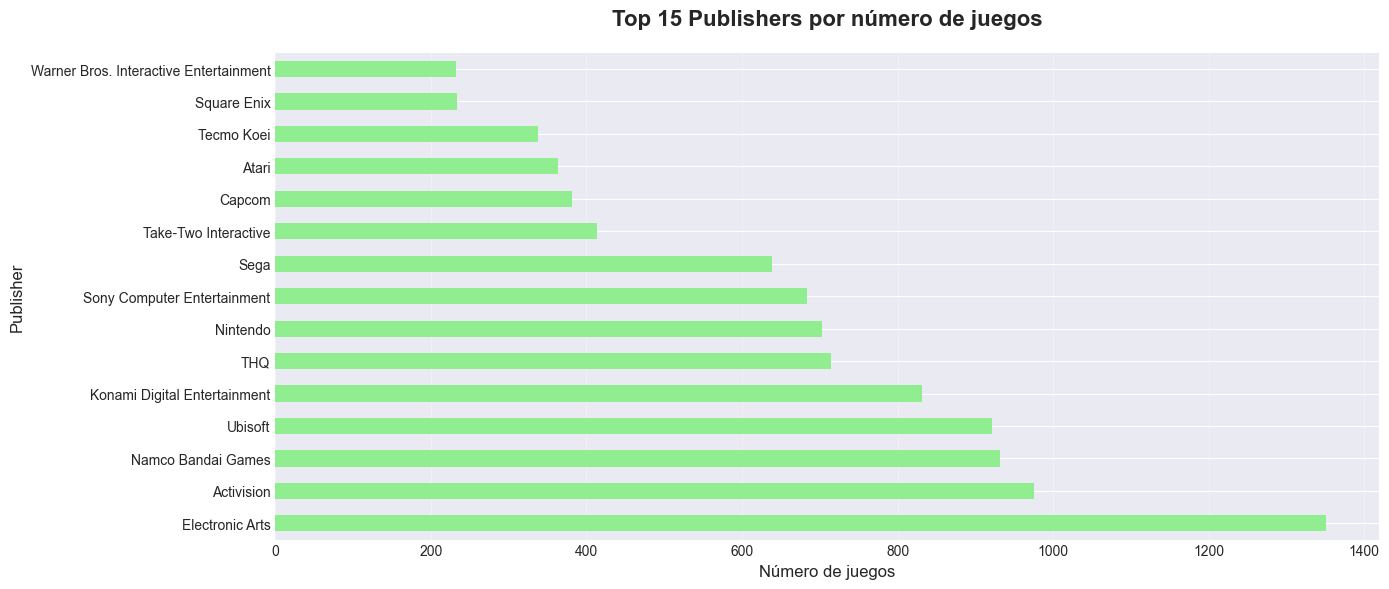

In [81]:
# Análisis de publishers
print("🏢 ANÁLISIS DE PUBLISHERS")
print("=" * 80)

publishers = datos['Publisher'].value_counts()
publishers

# Eliminar nulos para este análisis


# Eliminar nulos para este análisis
publishers = datos['Publisher'].dropna().value_counts()
print(f"Numero total de publishers: {datos['Publisher'].nunique()}")
print(f"\nTop 10 publishers por número de juegos:")
print(publishers.head(10))

# Visualización
plt.figure(figsize=(14, 6))
publishers.head(15).plot(kind='barh', color='lightgreen')
plt.title('Top 15 Publishers por número de juegos', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Número de juegos', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


# Visualización



### 5.4 Años (Year)

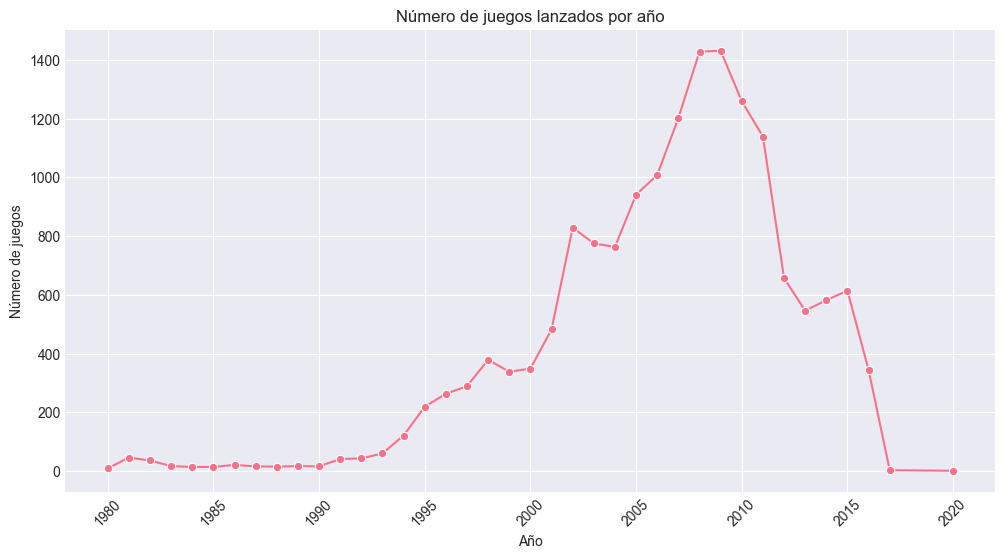

In [86]:
# Análisis temporal
analisis_temporal = datos['Year'].dropna().astype(int).value_counts().sort_index()
analisis_temporal
# Información básica

analisis_temporal.describe()

# Distribución por año
distribucion_anual = analisis_temporal.sort_index()
distribucion_anual


# Visualización

plt.figure(figsize=(12,6))
sns.lineplot(x=distribucion_anual.index, y=distribucion_anual.values, marker='o')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.show()


---
## 6. Análisis de Ventas

Ahora vamos a analizar las variables más importantes: las ventas.

In [91]:
# Estadísticas de ventas por región

ventas_region = {
    'NA_Sales': datos['NA_Sales'].sum(),
    'EU_Sales': datos['EU_Sales'].sum(),
    'JP_Sales': datos['JP_Sales'].sum(),
    'Other_Sales': datos['Other_Sales'].sum(),
    'Global_Sales': datos['Global_Sales'].sum()
}
# Crear DataFrame con estadísticas
ventas_region_df = pd.DataFrame(list(ventas_region.items()), columns=['Región', 'Ventas (millones)'])
ventas_region_df
# Calcular porcentaje de ventas por región
porcentaje_ventas = (ventas_region_df['Ventas (millones)'] / ventas_region_df['Ventas (millones)'].sum()) * 100
ventas_region_df['Porcentaje (%)'] = porcentaje_ventas.round(2)
ventas_region_df

,Región,Ventas (millones),Porcentaje (%)
0,NA_Sales,4392.95,24.63
1,EU_Sales,2434.13,13.65
2,JP_Sales,1291.02,7.24
3,Other_Sales,797.75,4.47
4,Global_Sales,8920.44,50.01


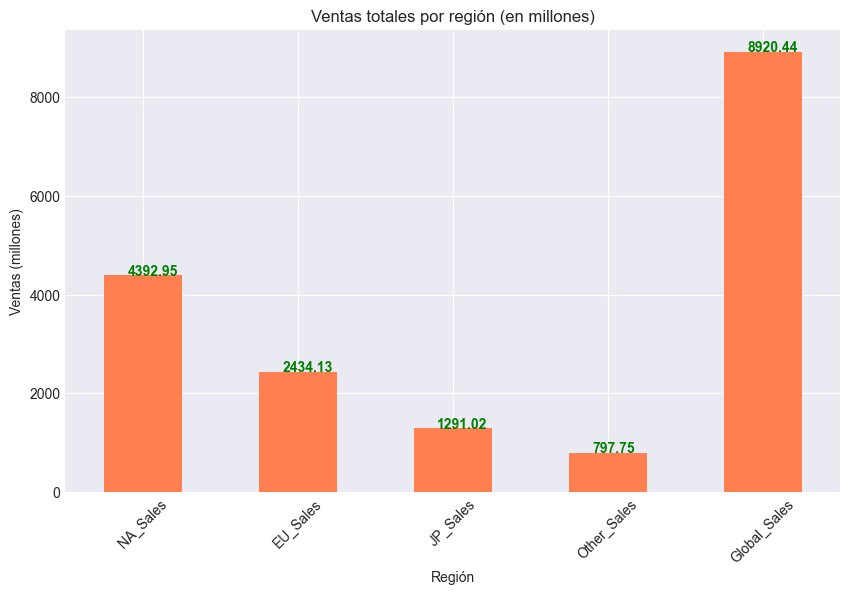

In [94]:
# Visualización de ventas por región

ventas_region_df.plot(kind='bar', x='Región', y='Ventas (millones)', color='coral', figsize=(10,6), legend=False)
plt.title('Ventas totales por región (en millones)')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
# Datos para el gráfico


# Crear gráfico de barras


# Añadir valores sobre las barras
for i, venta in enumerate(ventas_region_df['Ventas (millones)']):
    plt.text(i - 0.1, venta + 1, str(round(venta, 2)), color='green', fontweight='bold')

---
## 7. Top Juegos, Plataformas y Géneros por Ventas

/var/folders/m6/9v0_yl357zx85v4fgqtpsfj00000gn/T/ipykernel_24681/2433189844.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=top_10_juegos, palette='viridis')


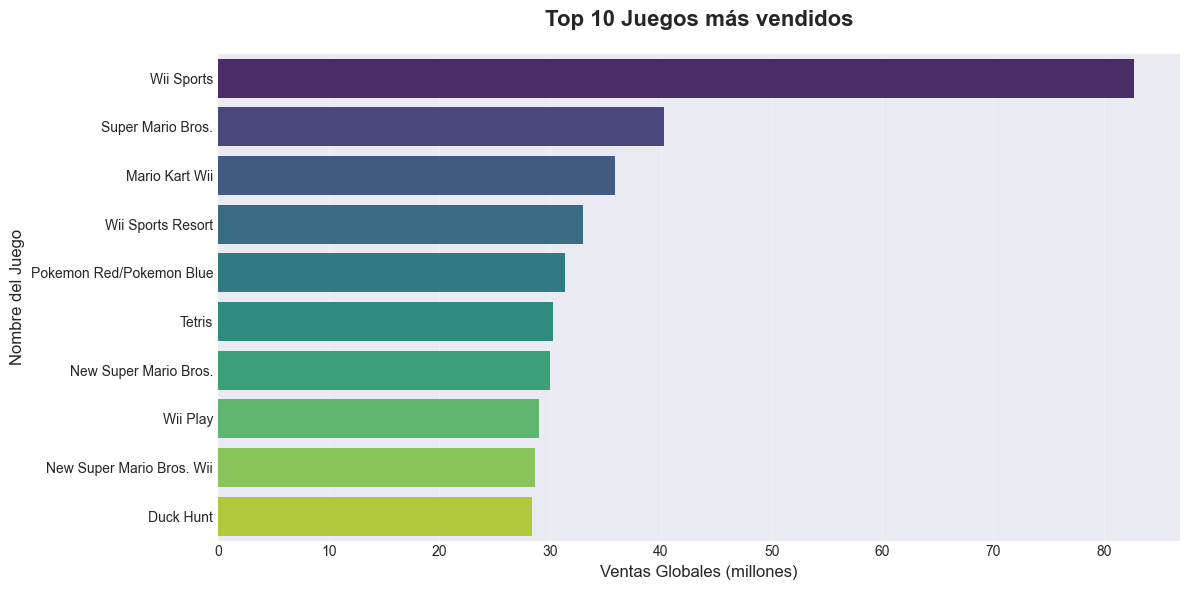

In [103]:
# Top 10 juegos más vendidos
top_10_juegos = datos[['Name','Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)
top_10_juegos


#vizualización de los 10 juegos más vendidos
plt.figure(figsize=(12,6))
sns.barplot(x='Global_Sales', y='Name', data=top_10_juegos, palette='viridis')
plt.title('Top 10 Juegos más vendidos', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ventas Globales (millones)', fontsize=12)
plt.ylabel('Nombre del Juego', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/m6/9v0_yl357zx85v4fgqtpsfj00000gn/T/ipykernel_24681/470759282.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_plataforma.index, y=ventas_por_plataforma.values, palette='viridis')


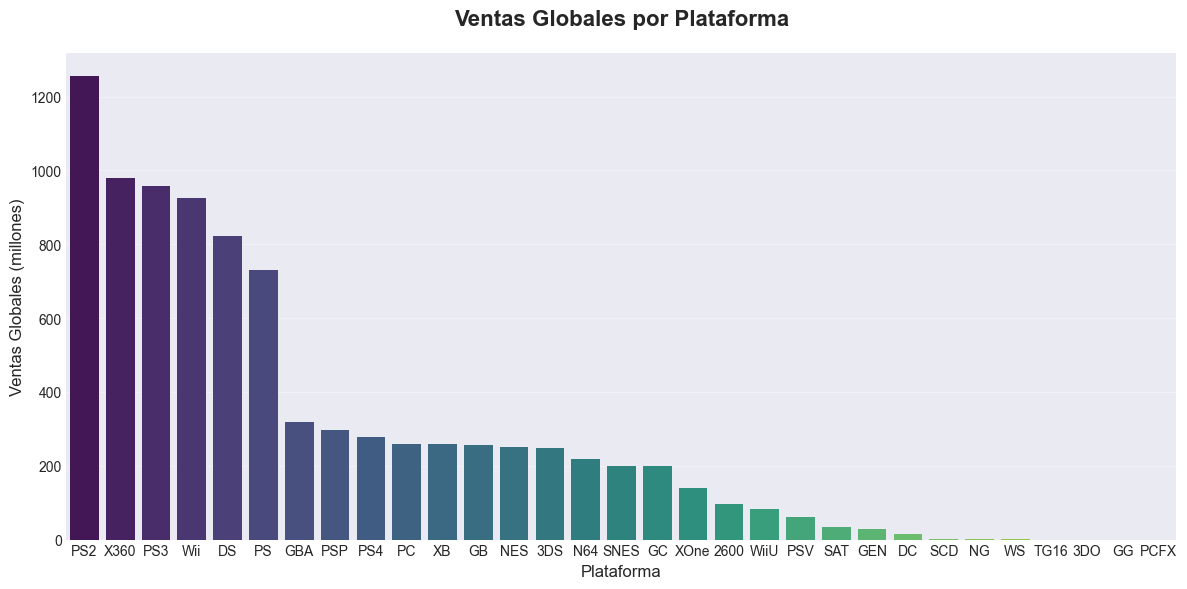

In [121]:
# Ventas por plataforma
ventas_por_plataforma= datos.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False) 
ventas_por_plataforma

plt.figure(figsize=(12,6))
sns.barplot(x=ventas_por_plataforma.index, y=ventas_por_plataforma.values, palette='viridis')
plt.title('Ventas Globales por Plataforma', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Globales (millones)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


/var/folders/m6/9v0_yl357zx85v4fgqtpsfj00000gn/T/ipykernel_24681/1494746135.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Global_Sales', data=top_10_genero_df, palette='coolwarm')


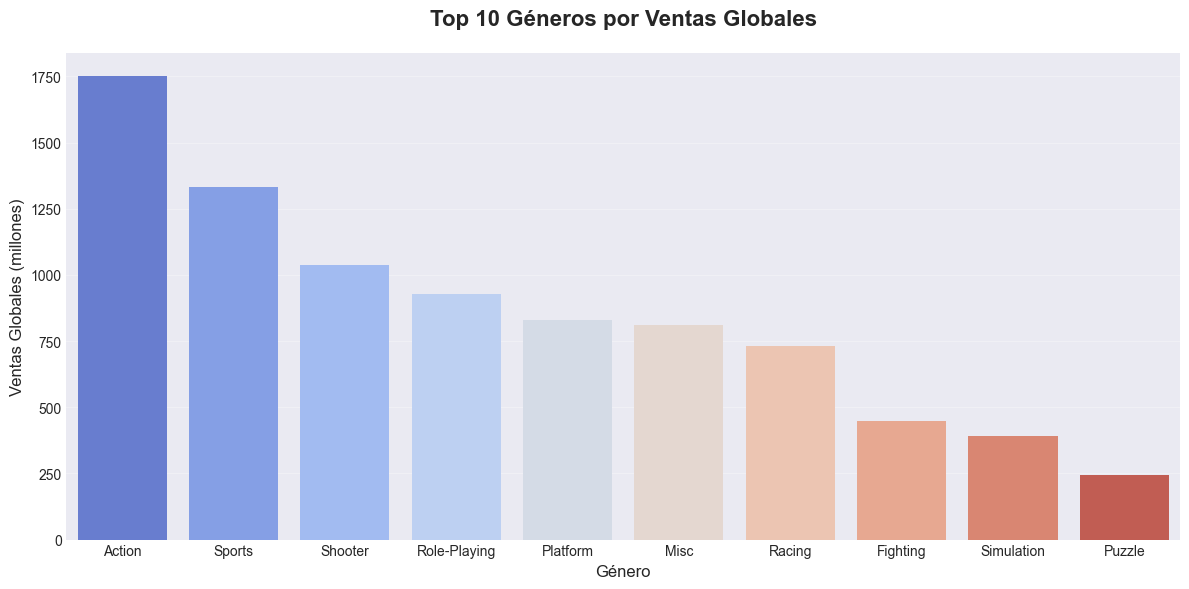

In [115]:
# Ventas por género
# Top 10 géneros por ventas globales
top_10_genero = datos.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_10_genero_df = top_10_genero.reset_index()

# Visualización
plt.figure(figsize=(12,6))
sns.barplot(x='Genre', y='Global_Sales', data=top_10_genero_df, palette='coolwarm')
plt.title('Top 10 Géneros por Ventas Globales', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas Globales (millones)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

---
## 8. Distribución de Ventas (Histogramas)

Los histogramas nos muestran cómo se distribuyen las ventas.

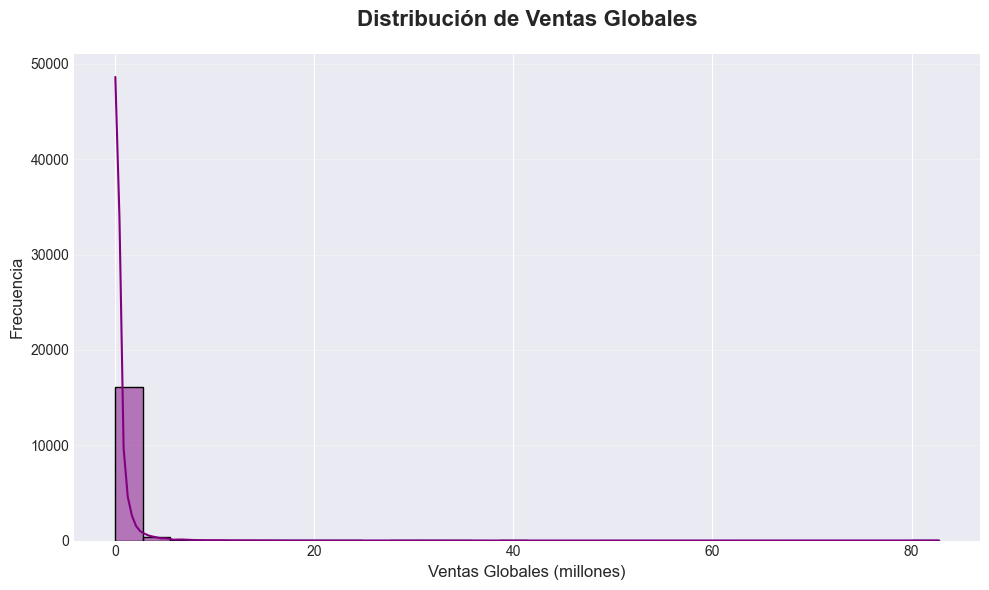

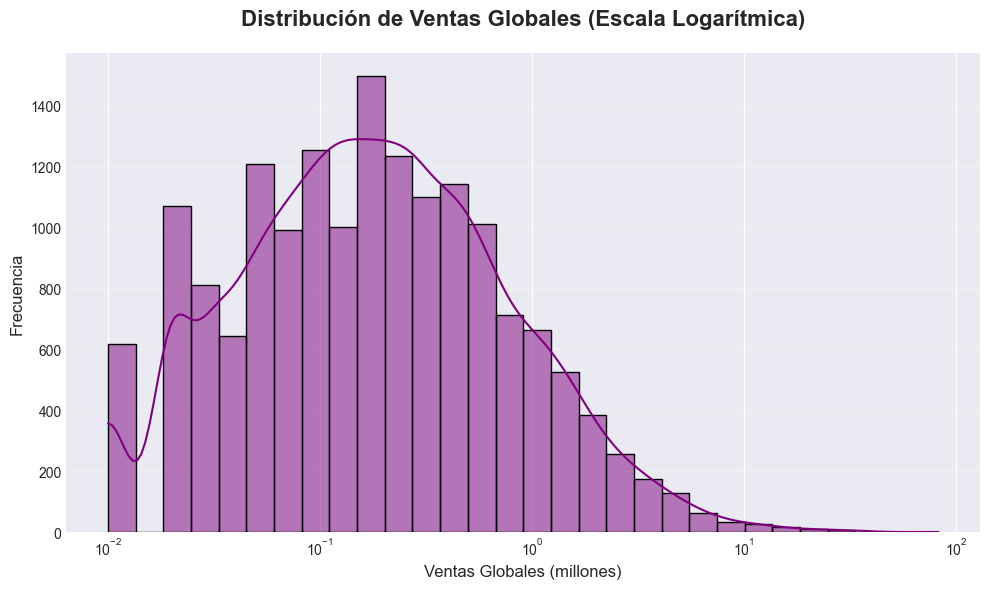

In [109]:
# Histograma de ventas globales
plt.figure(figsize=(10,6))
sns.histplot(datos['Global_Sales'], bins=30, kde=True, color='purple')
plt.title('Distribución de Ventas Globales', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ventas Globales (millones)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Escala logarítmica para ver mejor la distribución
plt.figure(figsize=(10,6))
sns.histplot(datos['Global_Sales'], bins=30, kde=True, color='purple', log_scale=True)
plt.title('Distribución de Ventas Globales (Escala Logarítmica)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ventas Globales (millones)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


---
## 9. Boxplots - Identificación de Outliers

Los boxplots nos ayudan a identificar valores atípicos (outliers).

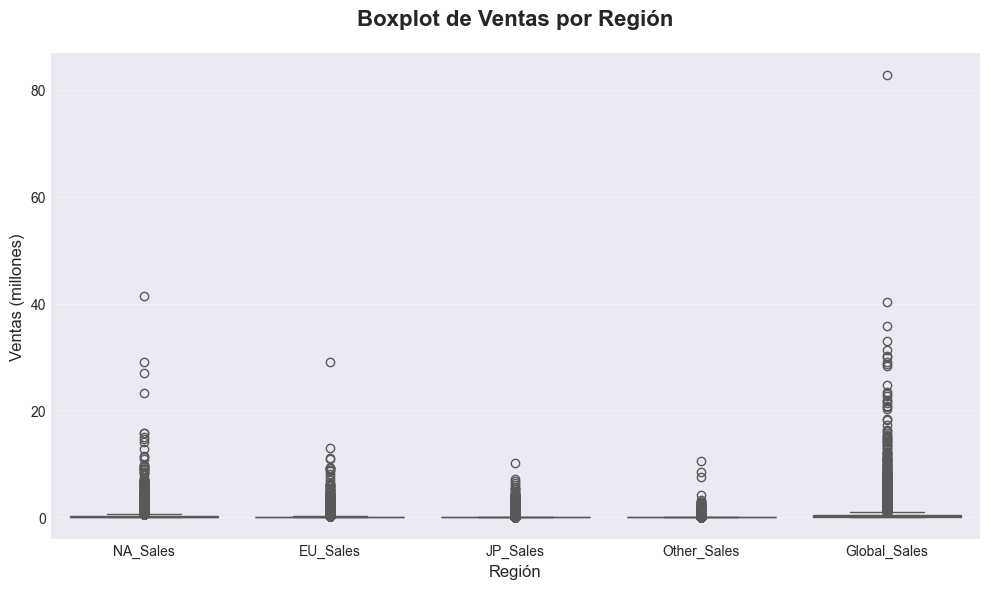

In [ ]:
# Boxplot de ventas por región
# Preparar datos
ventas_por_region = datos[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

# Crear boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=ventas_por_region, palette='Set2')
plt.title('Boxplot de Ventas por Región', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Ventas (millones)', fontsize=12)
plt.xlabel('Región', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

